In [ ]:
import pandas as pd
data = pd.read_csv("wdbc.data", delimiter=',', header=None)
data

In [9]:
y = data[1]
x = data.drop(columns=[1])


In [10]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [12]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)


In [65]:
train_x , test_x, train_y, test_y = train_test_split(x, y, test_size=0.8, random_state = 0)

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.fit_transform(test_x)


In [67]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [68]:
model = Sequential()


In [69]:
model.add(Dense(16, activation='relu', input_dim = 31))
model.add(Dense(16,activation='relu'))
model.add(Dense(1, activation='sigmoid',input_dim=31))
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [70]:
output = model.fit(train_x, train_y, batch_size=32, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 5ms/step - loss: 0.7386 - accuracy: 0.6106
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 0.6814 - accuracy: 0.6637
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 0.6322 - accuracy: 0.7345
Epoch 4/10
4/4 [==============================] - 0s 5ms/step - loss: 0.5851 - accuracy: 0.7611
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 0.5445 - accuracy: 0.8053
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 0.5075 - accuracy: 0.8319
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.4748 - accuracy: 0.8407
Epoch 8/10
4/4 [==============================] - 0s 8ms/step - loss: 0.4425 - accuracy: 0.8496
Epoch 9/10
4/4 [==============================] - 0s 5ms/step - loss: 0.4130 - accuracy: 0.8584
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 0.3862 - accuracy: 0.8850


In [71]:
y_pred = model.predict(test_x)
y_pred = (y_pred > 0.5)

15/15 [==============================] - 0s 2ms/step


In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(test_y, y_pred)
accuracy_score(test_y,y_pred)

0.9035087719298246

In [73]:
import matplotlib.pyplot as plt

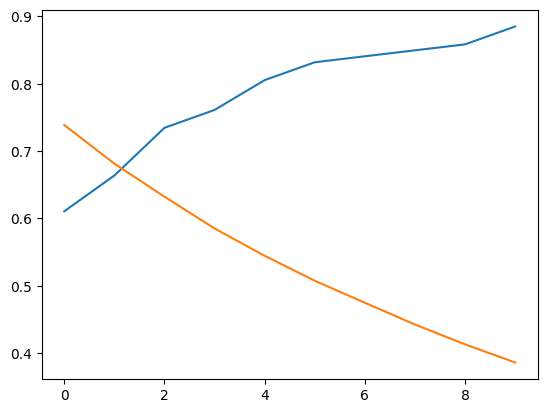

In [75]:
plt.plot(output.history['accuracy'])
plt.plot(output.history['loss'])
plt.show()
